In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [11]:
df=pd.read_csv('csv/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df2=pd.read_csv('csv/stud.csv')
df2.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Answer 1

# The key features in the wine quality dataset include:

# Fixed Acidity: This feature refers to the total amount of acids present in the wine. Acidity affects the taste and freshness of the wine. Wines with appropriate acidity levels are generally considered more balanced and flavorful.
# Volatile Acidity: This measures the presence of volatile acids, which can give a vinegar-like taste to wine if present in excessive amounts.
# Citric Acid: Citric acid can contribute to the wine's freshness and citrusy flavors. It's a desirable characteristic in some wines.
# Residual Sugar: This indicates the amount of sugar that remains after fermentation. It can affect the sweetness and body of the wine.
# Chlorides: The concentration of salts can influence the wine's taste and mouthfeel. Excessive chlorides can lead to a salty taste.
# Free Sulfur Dioxide and Total Sulfur Dioxide: Sulfur dioxide is added to wines as a preservative. The balance between free and total sulfur dioxide is important for stability and preventing oxidation.
# Density: The density of the wine can give an idea of its alcohol content. It's also related to the wine's body and mouthfeel.
# pH: pH affects the wine's acidity and stability. Proper pH levels are essential for fermentation and aging.
# Sulphates: Sulfates can contribute to the wine's preservation and flavor stability.
# Alcohol: The alcohol content impacts the wine's body, flavor, and overall character.
# Quality: This is the target variable. It represents the quality rating of the wine.

In [2]:
# Answer 2

# Different imputation techniques can be used for handling missing data, including mean, median, mode imputation, and more advanced methods like regression imputation. Each technique has its advantages and disadvantages. For example:

# Mean/Median/Mode Imputation: These methods are simple and can work well when missing data is randomly distributed. However, they may not capture complex relationships.
# mean imputation is used for normaly distributed data, median imputation is used for numerical data with outliers or skewed data, mode imputation is used for categorical data

# Regression Imputation: This is more sophisticated and considers relationships between variables. It can provide more accurate imputations but might be sensitive to outliers.

In [3]:
# Answer 3

# Key factors affecting students' performance include parental education, socioeconomic background, test preparation, and gender. 
# Analyzing these factors involves statistical techniques like correlation analysis, t-tests, ANOVA, and regression analysis. 
# For instance, regression can help understand how multiple factors collectively influence performance.

In [4]:
# Answer 4

# Feature engineering involves creating new features or modifying existing ones to enhance model performance. In the student performance dataset,
# I created new features like total score by summing math, reading, and writing scores. Encoded categorical variables, like gender and parental education, using techniques like one-hot encoding. Transformation of skewed variables (e.g., using logarithms) can improve normality.

In [24]:
# Answer 5

# distribution of each feature --

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


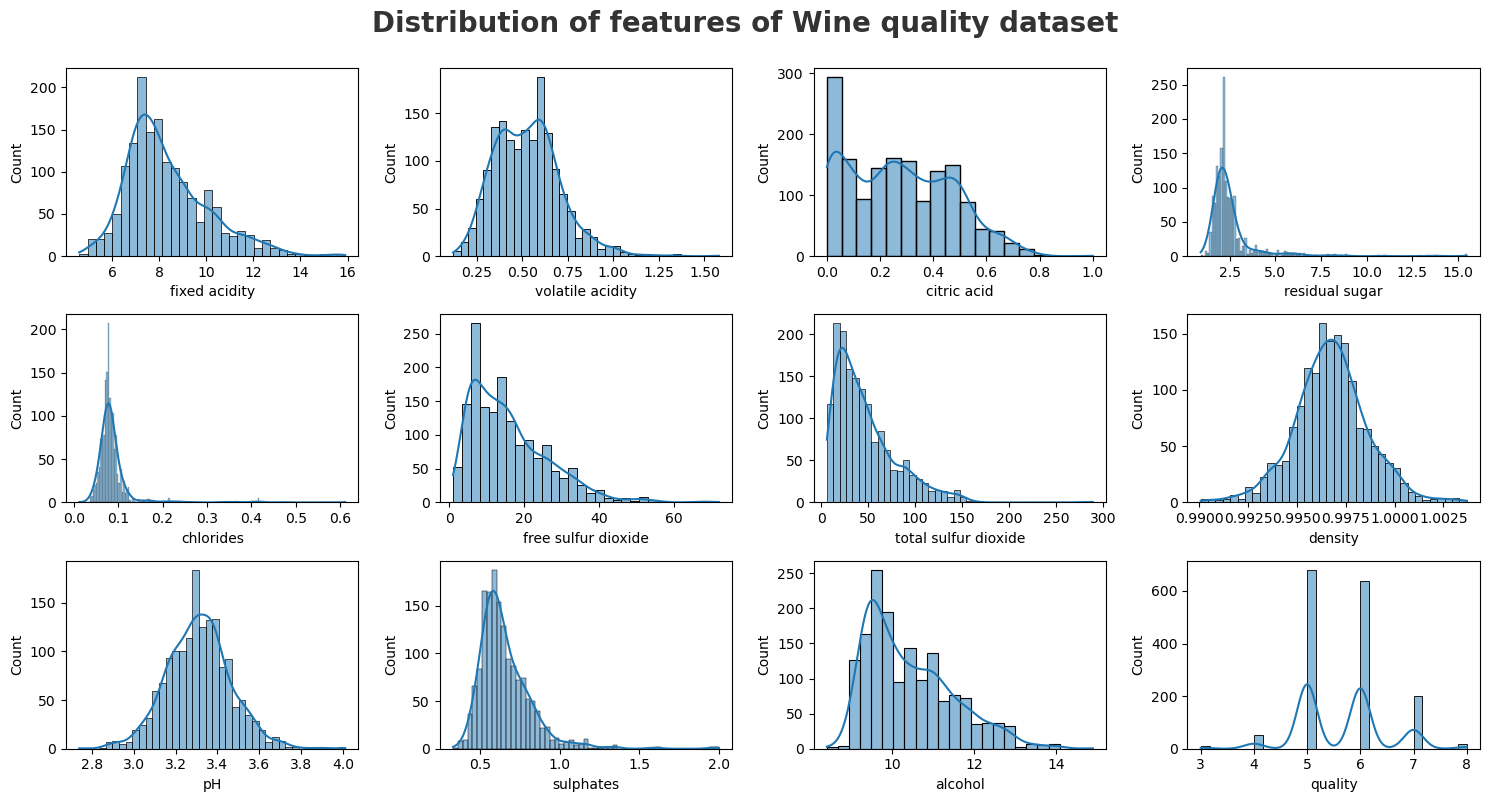

In [30]:
plt.figure(figsize=(15,10))
plt.suptitle('Distribution of features of Wine quality dataset', fontsize=20, fontweight='bold', alpha=0.8, y=1)
for col in range(0, len(df.columns)):
    plt.subplot(4,4, col+1)
    sns.histplot(x=df[df.columns[col]], kde=True)
    plt.tight_layout()

In [ ]:
# according to the above graphs, we can conclude that no feature is normally distributed. to improve normality we could apply transformations like --

# Log Transformation: Reduces right skewness, good for big range data.
# Square Root: Tames moderate right skewness.
# Reciprocal (1/x): Deals with highly right-skewed data, especially small values.
# Box-Cox: Adaptable to various skewness, includes log and square root.
# Exponential: Fixes left skewness via power transformation.
# Rank: Helps extreme non-normality by using percentiles.

In [37]:
# Answer 6

# Assuming "data" is your wine quality data as a NumPy array
data = df.values

# Split the data into features (X) and target (quality)
X = data[:, :-1]

# Initialize PCA
pca = PCA()

# Fit PCA to data
pca.fit(X)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components explaining at least 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Minimum number of components to explain 90% variance: {n_components_90}")


Minimum number of components to explain 90% variance: 1
